In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_excel(r"C:\Users\asli_\PYTHON_PROJECTS\CIMSA_PROJE\yeni_tablo.xlsx")

In [20]:
try:
    df = pd.read_excel("yeni_tablo.xlsx")
    print("Dosya Excel formatında.")
    # Dosyanın içeriğini önizle
    print(df.head())
except pd.errors.ParserError:
    print("Dosya Excel formatında değil.")
except FileNotFoundError:
    print("Dosya bulunamadı.")

Dosya Excel formatında.
   MALZEME   YIL ÜLKELER     TOPLAM  Denizyolu  Demiryolu  Karayolu
0  çimento  2018  A.B.D.  1832456.0  1832456.0        NaN       NaN
1  çimento  2018  İSRAİL  1229838.0  1229838.0        NaN       NaN
2  çimento  2018  SURİYE   777465.0        NaN        NaN  777465.0
3  çimento  2018   HAİTİ   384549.0   384549.0        NaN       NaN
4  çimento  2018    GANA   354634.0   354634.0        NaN       NaN


In [23]:
df.to_csv('yeni_tablo.csv', index=False)

In [24]:
df.head()

,MALZEME,YIL,ÜLKELER,TOPLAM,Denizyolu,Demiryolu,Karayolu
0,çimento,2018,A.B.D.,1832456.0,1832456.0,NaN,NaN
1,çimento,2018,İSRAİL,1229838.0,1229838.0,NaN,NaN
2,çimento,2018,SURİYE,777465.0,NaN,NaN,777465.0
3,çimento,2018,HAİTİ,384549.0,384549.0,NaN,NaN
4,çimento,2018,GANA,354634.0,354634.0,NaN,NaN


In [25]:
df.describe()

,YIL,TOPLAM,Denizyolu,Demiryolu,Karayolu
count,463.000000,4.630000e+02,4.350000e+02,11.000000,4.300000e+01
mean,2019.948164,1.534179e+05,1.431236e+05,90204.545455,1.809639e+05
std,1.380724,7.011777e+05,7.116742e+05,135012.548992,3.838099e+05
min,2018.000000,1.700000e+01,1.700000e+01,48.000000,3.000000e+00
25%,2019.000000,5.400000e+02,5.400000e+02,3497.500000,3.610000e+02
50%,2020.000000,5.189000e+03,5.001000e+03,18411.000000,4.411500e+04
75%,2021.000000,6.069200e+04,5.282300e+04,98769.000000,1.133810e+05
max,2022.000000,9.655155e+06,9.655155e+06,370038.000000,1.385720e+06


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MALZEME    463 non-null    object 
 1   YIL        463 non-null    int64  
 2   ÜLKELER    463 non-null    object 
 3   TOPLAM     463 non-null    float64
 4   Denizyolu  435 non-null    float64
 5   Demiryolu  11 non-null     float64
 6   Karayolu   43 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 25.4+ KB


In [28]:
df.isnull().sum()

MALZEME        0
YIL            0
ÜLKELER        0
TOPLAM         0
Denizyolu     28
Demiryolu    452
Karayolu     420
dtype: int64

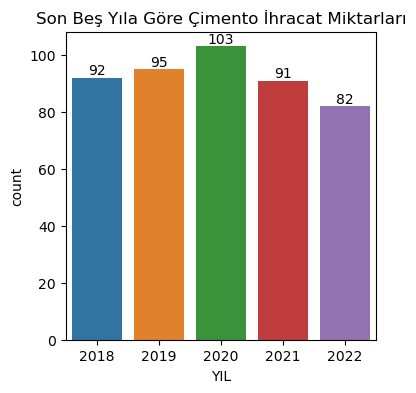

In [36]:
plt.figure(figsize = (4,4))
ax = sns.countplot(data = df, x = "YIL")
ax.bar_label(ax.containers[0])
plt.title("Son Beş Yıla Göre Çimento İhracat Miktarları")
plt.show()

In [37]:
gb = df.groupby("YIL").agg({"Denizyolu":'mean',"Demiryolu":'mean',"Karayolu":'mean'})
print(gb)

          Denizyolu  Demiryolu       Karayolu
YIL                                          
2018   71984.977273     1888.0  141269.875000
2019  107512.544944    22141.0  211582.785714
2020  153293.170213    54306.0  134901.250000
2021  178393.545455   370038.0  276497.333333
2022  213780.192105   168338.5  189241.100000


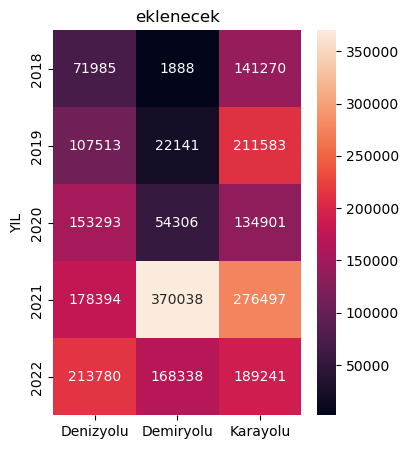

In [47]:
plt.figure(figsize = (4,5))
sns.heatmap(gb, annot=True, fmt=".0f")
plt.title("eklenecek")
plt.show()

In [55]:
gb1 = df.groupby("ÜLKELER").agg({"Denizyolu":'mean',"Demiryolu":'mean',"Karayolu":'mean'})
print(gb1)

               Denizyolu  Demiryolu  Karayolu
ÜLKELER                                      
A.B.D.      5.459118e+06        NaN       NaN
ABHAZYA     8.162750e+03        NaN    1442.0
AFGANİSTAN           NaN    50960.0   22444.0
ALMANYA     3.613175e+04        NaN      15.0
ANGOLA      1.400000e+02        NaN       NaN
...                  ...        ...       ...
İSRAİL      2.545918e+06        NaN  206100.0
İSVİÇRE     3.000000e+03        NaN       NaN
İTALYA      2.717694e+05        NaN       NaN
İZLANDA     4.841667e+03        NaN       NaN
ŞİLİ        4.007200e+03        NaN       NaN

[130 rows x 3 columns]


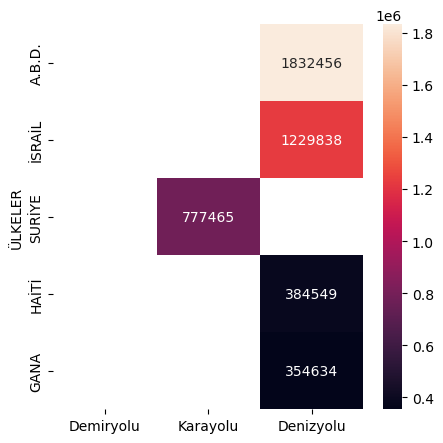

In [75]:
plt.figure(figsize=(5,5))
df_selected = df[['Demiryolu', 'Karayolu', 'Denizyolu','ÜLKELER']]
df_selected = df_selected.set_index('ÜLKELER')
df_top5 = df_selected.head(5)
heatmap = sns.heatmap(df_top5, annot=True, fmt=".0f")
plt.show()

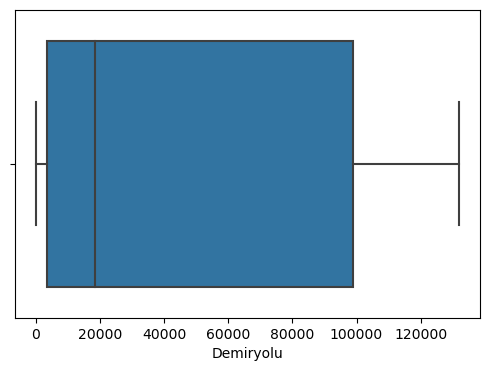

In [91]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = df, x = "Demiryolu", showfliers=False)
plt.show()

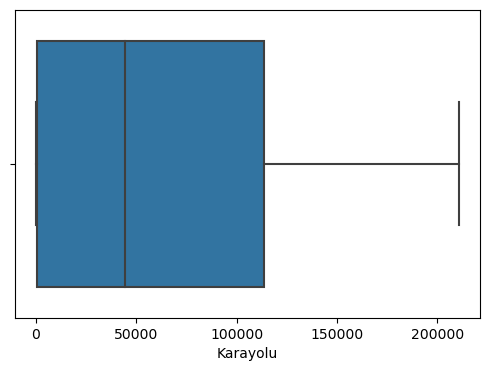

In [92]:
plt.figure(figsize = (6,4))
sns.boxplot(data = df, x = "Karayolu", showfliers=False)
plt.show()

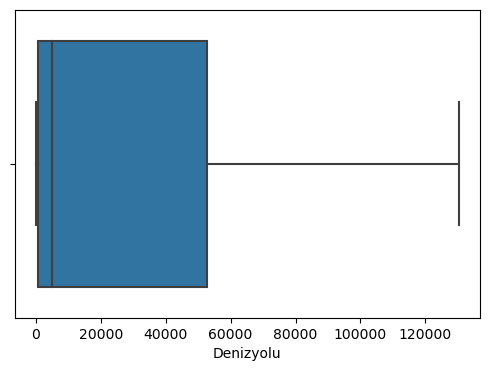

In [93]:
plt.figure(figsize = (6,4))
sns.boxplot(data = df, x = "Denizyolu", showfliers=False)
plt.show()

In [110]:
df.fillna(0, inplace=True)
df.to_csv('yeni_doldurulmus_tablo.csv', index=False)
print(df)

     MALZEME   YIL          ÜLKELER     TOPLAM  Denizyolu  Demiryolu  Karayolu
0    çimento  2018           A.B.D.  1832456.0  1832456.0        0.0       0.0
1    çimento  2018           İSRAİL  1229838.0  1229838.0        0.0       0.0
2    çimento  2018           SURİYE   777465.0        0.0        0.0  777465.0
3    çimento  2018            HAİTİ   384549.0   384549.0        0.0       0.0
4    çimento  2018             GANA   354634.0   354634.0        0.0       0.0
..       ...   ...              ...        ...        ...        ...       ...
458  çimento  2022           SOMALİ       84.0       84.0        0.0       0.0
459  çimento  2022            KONGO       80.0       80.0        0.0       0.0
460  çimento  2022            GABON       54.0       54.0        0.0       0.0
461  çimento  2022  TRİNİDAD TOBAGO       54.0       54.0        0.0       0.0
462  çimento  2022     TÜRKMENİSTAN       17.0       17.0        0.0       0.0

[463 rows x 7 columns]


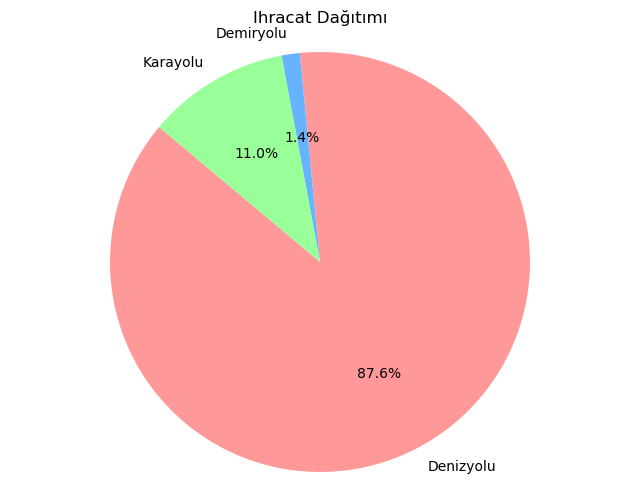

In [115]:
denizyolu_sum = df['Denizyolu'].sum()
demiryolu_sum = df['Demiryolu'].sum()
karayolu_sum = df['Karayolu'].sum()

# Daire grafiği oluştur
labels = ['Denizyolu', 'Demiryolu', 'Karayolu']
sizes = [denizyolu_sum, demiryolu_sum, karayolu_sum]
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ihracat Dağıtımı')
plt.axis('equal')  # Daireyi daire olarak tutmak için
plt.show()